In [1]:
import json
import pandas as pd
from pandas import json_normalize
import requests
from os import makedirs
from os.path import join, exists
from datetime import date, timedelta

In [2]:
API_KEY = "5c9dfd89-02ba-4815-82b5-eca1addeea7b"

## 1. Extract all the information about “Brexit” from 01.01.2017 until today.

In [3]:
def search_g_articles(api_key, search_term='', page=5000, page_size=10, format_='json'):
    #Retrieves meta data of articles matching the search term
    search_term = search_term.replace(' ', '%20')
    to_date = date.today().strftime('%Y-%m-%d')
    url = 'https://content.guardianapis.com/search'
    params = {'api-key':API_KEY,
             'format':'json',
              'page':page,
              'page-size':page_size,
              'from-date':"2017-01-01",
              'to-date' :to_date,
             'q':search_term}
    response = requests.get(url, params=params)
    return response.json()

In [4]:
def g_articles_df(api_key, search_term='', no_records=50000):
    df = pd.DataFrame()
    # Iterate through a series of API calls to retrieve the records, and append to dataframe
    for i in range(1,int(no_records / 200 + 1)):
        try:
            data = json_normalize(search_g_articles(api_key=API_KEY, search_term=search_term, page_size=200, page=i)['response']['results'])
            df = df.append(data)
        except:
            break
    df = df.reset_index(drop=True)
    return df[:no_records]

In [5]:
# Search the Guardian API with the term Brexit to get our dataset
Key = 'Brexit'
df = g_articles_df(api_key=API_KEY, search_term=Key, no_records=50000)
df.head()

,id,type,sectionId,sectionName,webPublicationDate,webTitle,webUrl,apiUrl,isHosted,pillarId,pillarName
0,business/2022/feb/21/treasury-plans-post-brexi...,article,business,Business,2022-02-21T20:54:40Z,Treasury plans post-Brexit overhaul of insuran...,https://www.theguardian.com/business/2022/feb/...,https://content.guardianapis.com/business/2022...,False,pillar/news,News
1,environment/2022/jan/29/nfu-president-farmers-...,article,environment,Environment,2022-01-29T16:00:03Z,NFU president: farmers are pawns in Brexit neg...,https://www.theguardian.com/environment/2022/j...,https://content.guardianapis.com/environment/2...,False,pillar/news,News
2,money/2022/feb/15/eu-parcel-problems-since-bre...,article,money,Money,2022-02-15T07:00:06Z,EU parcel problems since Brexit prompt flood o...,https://www.theguardian.com/money/2022/feb/15/...,https://content.guardianapis.com/money/2022/fe...,False,pillar/lifestyle,Lifestyle
3,politics/2022/feb/09/brexit-damaging-trade-wit...,article,politics,Politics,2022-02-09T00:01:36Z,"Brexit damaging trade with EU, says public acc...",https://www.theguardian.com/politics/2022/feb/...,https://content.guardianapis.com/politics/2022...,False,pillar/news,News
4,uk-news/2022/feb/04/brexit-checks-on-food-ente...,article,uk-news,UK news,2022-02-04T13:02:40Z,Brexit checks on food entering Northern Irelan...,https://www.theguardian.com/uk-news/2022/feb/0...,https://content.guardianapis.com/uk-news/2022/...,False,pillar/news,News


In [26]:
df

,id,type,sectionId,sectionName,webPublicationDate,webTitle,webUrl,apiUrl,isHosted,pillarId,pillarName
0,business/2022/feb/21/treasury-plans-post-brexi...,article,business,Business,2022-02-21T20:54:40Z,Treasury plans post-Brexit overhaul of insuran...,https://www.theguardian.com/business/2022/feb/...,https://content.guardianapis.com/business/2022...,False,pillar/news,News
1,environment/2022/jan/29/nfu-president-farmers-...,article,environment,Environment,2022-01-29T16:00:03Z,NFU president: farmers are pawns in Brexit neg...,https://www.theguardian.com/environment/2022/j...,https://content.guardianapis.com/environment/2...,False,pillar/news,News
2,money/2022/feb/15/eu-parcel-problems-since-bre...,article,money,Money,2022-02-15T07:00:06Z,EU parcel problems since Brexit prompt flood o...,https://www.theguardian.com/money/2022/feb/15/...,https://content.guardianapis.com/money/2022/fe...,False,pillar/lifestyle,Lifestyle
3,politics/2022/feb/09/brexit-damaging-trade-wit...,article,politics,Politics,2022-02-09T00:01:36Z,"Brexit damaging trade with EU, says public acc...",https://www.theguardian.com/politics/2022/feb/...,https://content.guardianapis.com/politics/2022...,False,pillar/news,News
4,uk-news/2022/feb/04/brexit-checks-on-food-ente...,article,uk-news,UK news,2022-02-04T13:02:40Z,Brexit checks on food entering Northern Irelan...,https://www.theguardian.com/uk-news/2022/feb/0...,https://content.guardianapis.com/uk-news/2022/...,False,pillar/news,News
...,...,...,...,...,...,...,...,...,...,...,...
28995,politics/blog/live/2018/feb/02/politics-live-r...,liveblog,politics,Politics,2018-02-02T09:15:29Z,Politics Live - readers' edition: Friday 2 Feb...,https://www.theguardian.com/politics/blog/live...,https://content.guardianapis.com/politics/blog...,False,pillar/news,News
28996,politics/2018/may/08/heidi-alexander-quits-as-...,article,politics,Politics,2018-05-08T12:06:26Z,Heidi Alexander quits as Labour MP to be Londo...,https://www.theguardian.com/politics/2018/may/...,https://content.guardianapis.com/politics/2018...,False,pillar/news,News
28997,politics/2017/feb/27/hard-brexit-push-risks-no...,article,politics,Politics,2017-02-27T18:36:51Z,Peter Hain: hard Brexit puts Northern Ireland ...,https://www.theguardian.com/politics/2017/feb/...,https://content.guardianapis.com/politics/2017...,False,pillar/news,News
28998,technology/2017/aug/15/countess-of-lovelace-wa...,article,technology,Technology,2017-08-15T16:53:37Z,Countess of Lovelace was the pioneer of progra...,https://www.theguardian.com/technology/2017/au...,https://content.guardianapis.com/technology/20...,False,pillar/news,News


In [7]:
Article_dates_df = df.filter(['webPublicationDate'], axis=1)
Article_dates_df.head()

,webPublicationDate
0,2022-02-21T20:54:40Z
1,2022-01-29T16:00:03Z
2,2022-02-15T07:00:06Z
3,2022-02-09T00:01:36Z
4,2022-02-04T13:02:40Z


In [8]:
Article_dates_df['webPublicationDate'] = Article_dates_df['webPublicationDate'].str.slice(0,10)
Article_dates_df['webPublicationDate'] = pd.to_datetime(Article_dates_df['webPublicationDate'], dayfirst=True)
Article_dates_df = Article_dates_df.rename(columns={'webPublicationDate': 'Date'})
Article_dates_df['Date'] = Article_dates_df['Date'].dt.strftime('%d.%m.%Y')
Article_dates_df

,Date
0,21.02.2022
1,29.01.2022
2,15.02.2022
3,09.02.2022
4,04.02.2022
...,...
28995,02.02.2018
28996,08.05.2018
28997,27.02.2017
28998,15.08.2017


In [9]:
print(Article_dates_df['Date'].dtypes)

object


In [10]:
#Article_dates_df = Article_dates_df.sort_values(by='Date',ascending=True)
Article_dates_df.head()

,Date
0,21.02.2022
1,29.01.2022
2,15.02.2022
3,09.02.2022
4,04.02.2022


In [11]:
#Article_dates_df["Date"] = pd.to_datetime(Article_dates_df["Date"])

In [12]:
#Article_dates_df = Article_dates_df.sort_values(by="Date",ascending=True)
#Article_dates_df

## 2. Count how many articles about “Brexit” have been posted since 01.01.2017 until today.

In [13]:
Article_dates_df2 = Article_dates_df.groupby(['Date']).size()
Article_dates_df2.reset_index(name='No. of articles')
Article_dates_df3 = pd.DataFrame({'Date':Article_dates_df2.index, 'No. of articles':Article_dates_df2.values})

Article_dates_df3

,Date,No. of articles
0,01.01.2018,7
1,01.01.2019,14
2,01.01.2020,13
3,01.01.2021,15
4,01.01.2022,6
...,...,...
1864,31.12.2017,6
1865,31.12.2018,14
1866,31.12.2019,19
1867,31.12.2020,28


In [15]:
Article_dates_df3['Date'] = pd.to_datetime(Article_dates_df3['Date'], format='%d.%m.%Y')

In [16]:
#Article_dates_df3['Date'] = Article_dates_df3['Date'].dt.strftime('%d.%m.%Y')
Article_dates_df3 = Article_dates_df3.sort_values(by="Date",ascending=True)
Article_dates_df3['Date'] = Article_dates_df3['Date'].dt.strftime('%d.%m.%Y')
Article_dates_df3

,Date,No. of articles
123,03.01.2017,3
185,04.01.2017,2
247,05.01.2017,1
309,06.01.2017,2
432,08.01.2017,1
...,...,...
1488,25.02.2022,7
1549,26.02.2022,3
1610,27.02.2022,7
1671,28.02.2022,9


In [17]:
Article_dates_df3.to_csv ('filename1.csv',index = False, header=True)

## 3. Average of the variable “No. of articles”

In [18]:
Article_dates_df3["No. of articles"].mean()

15.516318887105404

## 4. In which section are most articles written? (Plot your results)

In [19]:
Article_Sections_df = df.filter(['sectionName'], axis=1)
Article_Sections_df

,sectionName
0,Business
1,Environment
2,Money
3,Politics
4,UK news
...,...
28995,Politics
28996,Politics
28997,Politics
28998,Technology


In [20]:
Article_Sections_df2 = Article_Sections_df.groupby(['sectionName']).size()
Article_Sections_df2.reset_index(name='No. of articles in section')
Article_Sections_df2 = pd.DataFrame({'Section':Article_Sections_df2.index, 'No. of articles in section':Article_Sections_df2.values})
Article_Sections_df2

,Section,No. of articles in section
0,All together,1
1,Animals farmed,11
2,Art and design,155
3,Australia news,300
4,Books,567
5,Business,3517
6,Business to business,3
7,Cities,19
8,Community,18
9,Crosswords,19


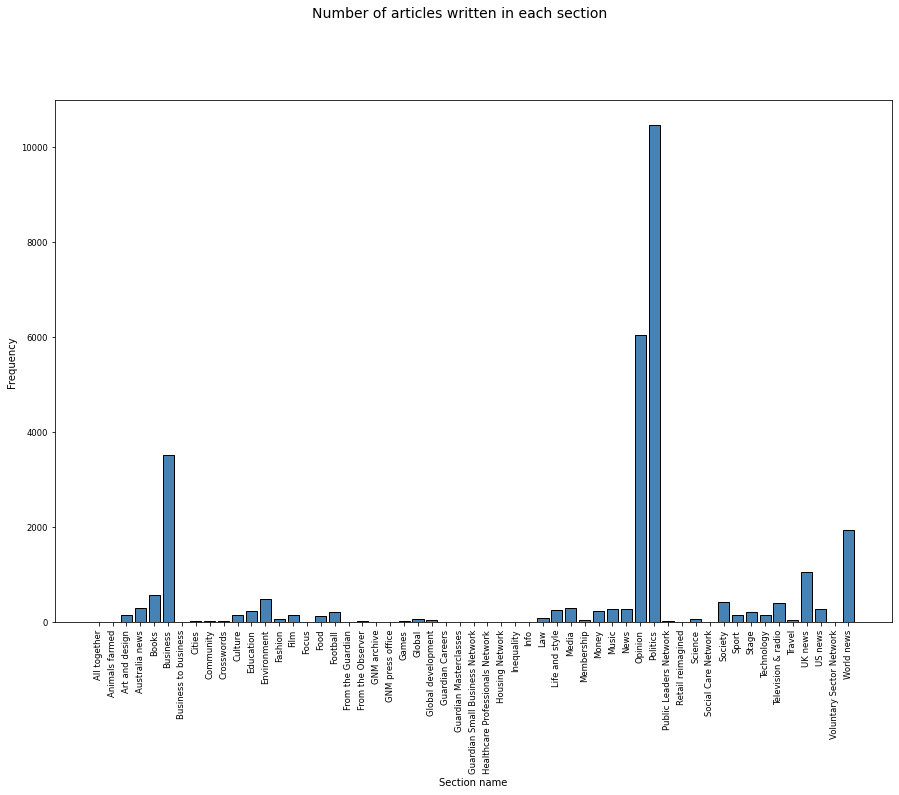

In [21]:
import matplotlib.pyplot as plt
# Bar Plot to identify most popular section
fig = plt.figure(figsize = (15, 10))

title = fig.suptitle("Number of articles written in each section", fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)

ax = fig.add_subplot(1,1, 1)
ax.set_xlabel("Section name")
ax.set_ylabel("Frequency") 
plt.xticks(rotation=90)
ax.tick_params(axis='both', which='major', labelsize=8.5)
bar = ax.bar(Article_Sections_df2["Section"],Article_Sections_df2["No. of articles in section"], color='steelblue', 
        edgecolor='black', linewidth=1)


## 5. Plot the evolution of "No. of articles" over time for the above period (time series).

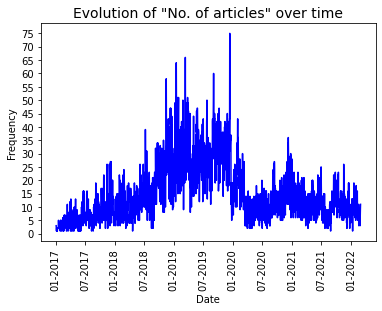

In [27]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import (MultipleLocator,
                               FormatStrFormatter,
                               AutoMinorLocator)
import numpy as np
import datetime

x_values = [datetime.datetime.strptime(d,"%d.%m.%Y").date() for d in Article_dates_df3['Date']]
fig, ax = plt.subplots()

ax.plot(x_values,Article_dates_df3["No. of articles"],color='b')
ax.set_title('Evolution of "No. of articles" over time', fontsize=14)
ax.set_xlabel('Date')
ax.set_ylabel('Frequency')
plt.xticks(rotation=90)

months = mdates.MonthLocator(interval=6)
months_fmt = mdates.DateFormatter('%m-%Y')
ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(months_fmt)

plt.yticks(np.arange(min(Article_dates_df3["No. of articles"]-1), max(Article_dates_df3["No. of articles"])+1, 5.0))

plt.show()

### 6. Are there any unusual events in the time series under investigation? If so, show
### these. Why are these unusual and what have triggered those unusual events?
### (Define for yourself what you want to show by ordinary or unusual).

In [30]:
Article_dates_df3[Article_dates_df3['No. of articles'] > 55]

,Date,No. of articles
914,15.11.2018,58
925,16.01.2019,64
753,13.03.2019,66
229,04.09.2019,60
798,13.12.2019,75


In [35]:
df_unusual = df[df['webPublicationDate'].str.contains('2018-11-15')]
df_unusual.head()

,id,type,sectionId,sectionName,webPublicationDate,webTitle,webUrl,apiUrl,isHosted,pillarId,pillarName
9611,business/2018/nov/15/banking-sector-backs-brex...,article,business,Business,2018-11-15T13:26:11Z,Banking sector cautiously backs May's Brexit deal,https://www.theguardian.com/business/2018/nov/...,https://content.guardianapis.com/business/2018...,False,pillar/news,News
9848,politics/2018/nov/15/beleaguered-may-offers-go...,article,politics,Politics,2018-11-15T16:28:22Z,Beleaguered May 'offers Gove Brexit secretary ...,https://www.theguardian.com/politics/2018/nov/...,https://content.guardianapis.com/politics/2018...,False,pillar/news,News
10392,commentisfree/2018/nov/15/theresa-may-brexit-d...,article,commentisfree,Opinion,2018-11-15T18:17:35Z,Theresa May’s Brexit deal demands a free vote ...,https://www.theguardian.com/commentisfree/2018...,https://content.guardianapis.com/commentisfree...,False,pillar/opinion,Opinion
11264,politics/2018/nov/15/what-happens-next-if-ther...,article,politics,Politics,2018-11-15T18:05:55Z,What happens next if Theresa May's Brexit deal...,https://www.theguardian.com/politics/2018/nov/...,https://content.guardianapis.com/politics/2018...,False,pillar/news,News
11518,politics/2018/nov/15/sturgeon-brexit-chaos-mak...,article,politics,Politics,2018-11-15T16:12:23Z,Sturgeon: Brexit chaos makes independence case...,https://www.theguardian.com/politics/2018/nov/...,https://content.guardianapis.com/politics/2018...,False,pillar/news,News


In [34]:
df_unusual_1 = df[df['webPublicationDate'].str.contains('2019-01-16')]
df_unusual_1.head()

,id,type,sectionId,sectionName,webPublicationDate,webTitle,webUrl,apiUrl,isHosted,pillarId,pillarName
8657,politics/2019/jan/16/germany-and-france-signal...,article,politics,Politics,2019-01-16T18:31:40Z,Germany and France signal willingness to delay...,https://www.theguardian.com/politics/2019/jan/...,https://content.guardianapis.com/politics/2019...,False,pillar/news,News
8661,politics/2019/jan/16/labour-mps-declare-suppor...,article,politics,Politics,2019-01-16T14:59:20Z,Labour MPs declare support for second Brexit r...,https://www.theguardian.com/politics/2019/jan/...,https://content.guardianapis.com/politics/2019...,False,pillar/news,News
8891,world/2019/jan/16/wednesday-briefing-brexit-de...,article,world,World news,2019-01-16T06:30:10Z,Wednesday briefing: Brexit deal gets worst vot...,https://www.theguardian.com/world/2019/jan/16/...,https://content.guardianapis.com/world/2019/ja...,False,pillar/news,News
9356,politics/2019/jan/16/in-search-of-a-way-out-of...,article,politics,Politics,2019-01-16T18:41:08Z,In search of a way out of Brexit deadlock | Le...,https://www.theguardian.com/politics/2019/jan/...,https://content.guardianapis.com/politics/2019...,False,pillar/news,News
9357,politics/2019/jan/16/mps-must-now-use-their-ow...,article,politics,Politics,2019-01-16T18:40:34Z,MPs must now use their own judgment on Brexit ...,https://www.theguardian.com/politics/2019/jan/...,https://content.guardianapis.com/politics/2019...,False,pillar/news,News


In [37]:
df_unusual_2 = df[df['webPublicationDate'].str.contains('2019-03-13')]
df_unusual_2

,id,type,sectionId,sectionName,webPublicationDate,webTitle,webUrl,apiUrl,isHosted,pillarId,pillarName
7072,uk-news/2019/mar/13/hammond-promises-brexit-di...,article,uk-news,UK news,2019-03-13T13:39:53Z,Hammond promises Brexit dividend in spring sta...,https://www.theguardian.com/uk-news/2019/mar/1...,https://content.guardianapis.com/uk-news/2019/...,False,pillar/news,News
7451,politics/2019/mar/13/civil-service-stressed-an...,article,politics,Politics,2019-03-13T11:09:41Z,Civil service stressed and floundering amid Br...,https://www.theguardian.com/politics/2019/mar/...,https://content.guardianapis.com/politics/2019...,False,pillar/news,News
7595,politics/2019/mar/13/brexit-chaos-in-the-commo...,article,politics,Politics,2019-03-13T20:47:49Z,Brexit chaos in the Commons: what just happened?,https://www.theguardian.com/politics/2019/mar/...,https://content.guardianapis.com/politics/2019...,False,pillar/news,News
8546,us-news/2019/mar/13/college-admissions-scam-bo...,article,us-news,US news,2019-03-13T11:55:51Z,"US briefing: College admissions scam, Boeing p...",https://www.theguardian.com/us-news/2019/mar/1...,https://content.guardianapis.com/us-news/2019/...,False,pillar/news,News
8726,politics/2019/mar/13/id-cards-a-possibility-af...,article,politics,Politics,2019-03-13T12:20:18Z,"ID cards a possibility after Brexit, says UK i...",https://www.theguardian.com/politics/2019/mar/...,https://content.guardianapis.com/politics/2019...,False,pillar/news,News
...,...,...,...,...,...,...,...,...,...,...,...
23913,fashion/shortcuts/2019/mar/13/the-perfect-moth...,article,fashion,Fashion,2019-03-13T15:25:34Z,"The perfect mother-of-the-bride dress? Black, ...",https://www.theguardian.com/fashion/shortcuts/...,https://content.guardianapis.com/fashion/short...,False,pillar/lifestyle,Lifestyle
23960,commentisfree/2019/mar/13/the-guardian-view-on...,article,commentisfree,Opinion,2019-03-13T18:52:38Z,The Guardian view on ending austerity: in rhet...,https://www.theguardian.com/commentisfree/2019...,https://content.guardianapis.com/commentisfree...,False,pillar/opinion,Opinion
27234,football/2019/mar/13/the-fiver-liverpool-jurge...,article,football,Football,2019-03-13T16:06:41Z,"The Fiver | Seven concepts, a PowerPoint prese...",https://www.theguardian.com/football/2019/mar/...,https://content.guardianapis.com/football/2019...,False,pillar/sport,Sport
27625,politics/2019/mar/13/as-the-losses-take-their-...,article,politics,Politics,2019-03-13T21:01:32Z,"As the losses take their toll, May is now a le...",https://www.theguardian.com/politics/2019/mar/...,https://content.guardianapis.com/politics/2019...,False,pillar/news,News


In [38]:
df_unusual_3 = df[df['webPublicationDate'].str.contains('2019-09-04')]
df_unusual_3

,id,type,sectionId,sectionName,webPublicationDate,webTitle,webUrl,apiUrl,isHosted,pillarId,pillarName
5072,politics/2019/sep/04/pmqs-jeremy-corbyn-lambas...,article,politics,Politics,2019-09-04T12:27:55Z,PMQs: Corbyn lambasts Johnson's Brexit plan af...,https://www.theguardian.com/politics/2019/sep/...,https://content.guardianapis.com/politics/2019...,False,pillar/news,News
5235,us-news/2019/sep/04/us-briefing-bahamas-storm-...,article,us-news,US news,2019-09-04T10:16:59Z,"US briefing: Bahamas storm tragedy, Brexit dra...",https://www.theguardian.com/us-news/2019/sep/0...,https://content.guardianapis.com/us-news/2019/...,False,pillar/news,News
5357,politics/2019/sep/04/irish-pm-looking-forward-...,article,politics,Politics,2019-09-04T17:01:21Z,Irish PM 'looking forward' to hearing Boris Jo...,https://www.theguardian.com/politics/2019/sep/...,https://content.guardianapis.com/politics/2019...,False,pillar/news,News
5467,environment/shortcuts/2019/sep/04/sexy-beasts-...,article,environment,Environment,2019-09-04T13:38:00Z,Sexy beasts: why Brexit is giving zoo animals ...,https://www.theguardian.com/environment/shortc...,https://content.guardianapis.com/environment/s...,False,pillar/news,News
5613,politics/2019/sep/04/tory-peers-accused-wrecki...,article,politics,Politics,2019-09-04T10:43:04Z,Tory peers accused of wrecking tactics over bi...,https://www.theguardian.com/politics/2019/sep/...,https://content.guardianapis.com/politics/2019...,False,pillar/news,News
5859,politics/2019/sep/04/bank-of-england-revises-i...,article,politics,Politics,2019-09-04T17:52:49Z,Bank of England: no-deal Brexit less severe th...,https://www.theguardian.com/politics/2019/sep/...,https://content.guardianapis.com/politics/2019...,False,pillar/news,News
5861,politics/2019/sep/04/no-deal-brexit-food-short...,article,politics,Politics,2019-09-04T14:45:17Z,No-deal Brexit will bring food shortages despi...,https://www.theguardian.com/politics/2019/sep/...,https://content.guardianapis.com/politics/2019...,False,pillar/news,News
5865,politics/2019/sep/04/brexit-minister-complains...,article,politics,Politics,2019-09-04T10:08:04Z,Brexit minister complains EU has offered no so...,https://www.theguardian.com/politics/2019/sep/...,https://content.guardianapis.com/politics/2019...,False,pillar/news,News
6403,politics/2019/sep/04/tories-turning-into-brexi...,article,politics,Politics,2019-09-04T16:21:23Z,'They're turning into the Brexit party': Phili...,https://www.theguardian.com/politics/2019/sep/...,https://content.guardianapis.com/politics/2019...,False,pillar/news,News
6410,commentisfree/2019/sep/04/britain-mired-democr...,article,commentisfree,Opinion,2019-09-04T05:00:15Z,Britain is mired in democratic crisis – but it...,https://www.theguardian.com/commentisfree/2019...,https://content.guardianapis.com/commentisfree...,False,pillar/opinion,Opinion


In [39]:
df_unusual_4 = df[df['webPublicationDate'].str.contains('2019-12-13')]
df_unusual_4

,id,type,sectionId,sectionName,webPublicationDate,webTitle,webUrl,apiUrl,isHosted,pillarId,pillarName
2947,politics/2019/dec/13/dont-attribute-this-histo...,article,politics,Politics,2019-12-13T17:12:27Z,Don’t attribute this historic loss to Brexit |...,https://www.theguardian.com/politics/2019/dec/...,https://content.guardianapis.com/politics/2019...,False,pillar/news,News
3327,commentisfree/2019/dec/13/boris-johnson-brexit...,article,commentisfree,Opinion,2019-12-13T03:30:10Z,What will Boris Johnson's majority mean for Br...,https://www.theguardian.com/commentisfree/2019...,https://content.guardianapis.com/commentisfree...,False,pillar/opinion,Opinion
3639,politics/2019/dec/13/brexit-what-the-tories-la...,article,politics,Politics,2019-12-13T07:00:37Z,What does the Tories' landslide victory mean f...,https://www.theguardian.com/politics/2019/dec/...,https://content.guardianapis.com/politics/2019...,False,pillar/news,News
3739,politics/2019/dec/13/is-this-conservative-vict...,article,politics,Politics,2019-12-13T16:50:03Z,Is this Conservative victory a one-hit Brexit ...,https://www.theguardian.com/politics/2019/dec/...,https://content.guardianapis.com/politics/2019...,False,pillar/news,News
3741,business/2019/dec/13/johnsons-brexit-needs-to-...,article,business,Business,2019-12-13T15:51:47Z,Johnson's Brexit needs to deliver economic ben...,https://www.theguardian.com/business/2019/dec/...,https://content.guardianapis.com/business/2019...,False,pillar/news,News
...,...,...,...,...,...,...,...,...,...,...,...
20011,food/2019/dec/13/the-ivy-asia-st-pauls-london-...,article,food,Food,2019-12-13T09:30:40Z,"The Ivy Asia, London EC4: ‘Showy, daft, but al...",https://www.theguardian.com/food/2019/dec/13/t...,https://content.guardianapis.com/food/2019/dec...,False,pillar/lifestyle,Lifestyle
20736,commentisfree/2019/dec/13/victory-boris-johnso...,article,commentisfree,Opinion,2019-12-13T17:59:58Z,This was a stunning victory for the bullshit-i...,https://www.theguardian.com/commentisfree/2019...,https://content.guardianapis.com/commentisfree...,False,pillar/opinion,Opinion
20739,sport/blog/2019/dec/13/britain-moral-high-grou...,article,sport,Sport,2019-12-13T16:18:11Z,Why Britain cannot claim moral high ground aft...,https://www.theguardian.com/sport/blog/2019/de...,https://content.guardianapis.com/sport/blog/20...,False,pillar/sport,Sport
22664,uk-news/2019/dec/13/fifty-shades-of-dismay-gri...,article,uk-news,UK news,2019-12-13T10:45:38Z,Fifty shades of dismay as grimmest campaign ev...,https://www.theguardian.com/uk-news/2019/dec/1...,https://content.guardianapis.com/uk-news/2019/...,False,pillar/news,News


In [23]:
# fig = plt.figure(figsize = (15, 10))

# title = fig.suptitle('Evolution of "No. of articles" over time', fontsize=14)
# fig.subplots_adjust(top=0.85, wspace=0.3)
# ax1 = fig.add_subplot(1,1, 1)
# ax1.set_xlabel("Date")
# ax1.set_ylabel("No. of articles")
# plt.xticks(rotation=90)
# ax.tick_params(axis='both', which='major', labelsize=8.5)
# plt.plot(Article_dates_df3["Date"],Article_dates_df3["No. of articles"], color='steelblue', linewidth=1)

# Thanks